In [47]:
%matplotlib inline
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [48]:
df = pd.read_pickle("../data/dataset.pkl")
df = df.drop("watchers", 1)
df = df.drop("network", 1)
df = df[df["code_lines"] > 100]
df = df[df["code_classes"] > 1]
df = df[df["code_functions"] > 1]

In [49]:
df["test_lines"].sum() / df["code_lines"].sum()

0.27079257061194723

In [50]:
df["test_classes"].sum() / df["code_classes"].sum()

0.33757493539909067

In [51]:
df["test_functions"].sum() / df["code_functions"].sum()

0.28955069937648709

In [52]:
df["line_ratio"] = df["test_lines"] / df["code_lines"]
df["class_ratio"] = df["test_classes"] / df["code_classes"]
df["function_ratio"] = df["test_functions"] / df["code_functions"]

In [53]:
df.describe()

,forks,stargazers,code_lines,code_classes,code_functions,test_lines,test_classes,test_functions,line_ratio,class_ratio,function_ratio
count,2454.000000,2454.000000,2.454000e+03,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,546.714344,1784.965363,5.770899e+04,369.171557,2989.215159,15627.165037,124.623064,865.529340,0.254586,0.303415,0.382195
std,759.670387,2170.620522,2.169138e+05,1565.151775,13052.803338,55461.396244,515.217030,3217.503512,0.577396,1.819664,0.844702
min,11.000000,0.000000,1.430000e+02,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.000000,761.500000,2.487500e+03,17.000000,113.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,337.000000,1183.500000,8.362000e+03,60.000000,369.000000,531.500000,3.000000,33.000000,0.062910,0.060638,0.070674
75%,572.000000,1961.000000,3.338775e+04,246.000000,1475.000000,5099.750000,37.000000,306.250000,0.345198,0.324675,0.432584
max,9388.000000,26783.000000,4.825865e+06,64106.000000,274578.000000,710877.000000,9562.000000,49866.000000,13.998742,84.500000,24.368421


In [54]:
df[df["language"] == "Python"].mean()

forks               412.428191
stargazers         1699.030142
code_lines        28403.433511
code_classes        206.668440
code_functions     1015.520390
test_lines         9949.679965
test_classes         71.471631
test_functions      619.476950
line_ratio            0.329692
class_ratio           0.384776
function_ratio        0.599169
dtype: float64

In [55]:
df[df["language"] == "Java"].mean()

forks               660.948718
stargazers         1858.068627
code_lines        82638.598793
code_classes        507.409502
code_functions     4668.195324
test_lines        20456.880845
test_classes        169.837858
test_functions     1074.840875
line_ratio            0.190694
class_ratio           0.234202
function_ratio        0.197620
dtype: float64

In [56]:
python = df[df["language"] == "Python"]
java = df[df["language"] == "Java"]

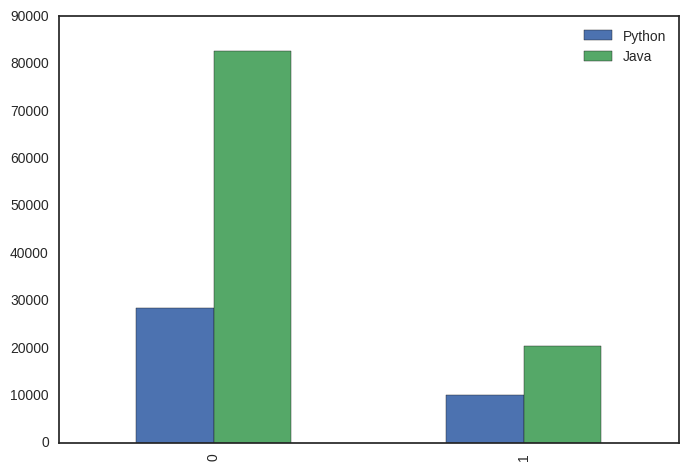

In [57]:
x = [[python["code_lines"].mean(), java["code_lines"].mean()], [python["test_lines"].mean(), java["test_lines"].mean()]]
df2 = pd.DataFrame(x, columns=["Python", "Java"])
df2.plot.bar();

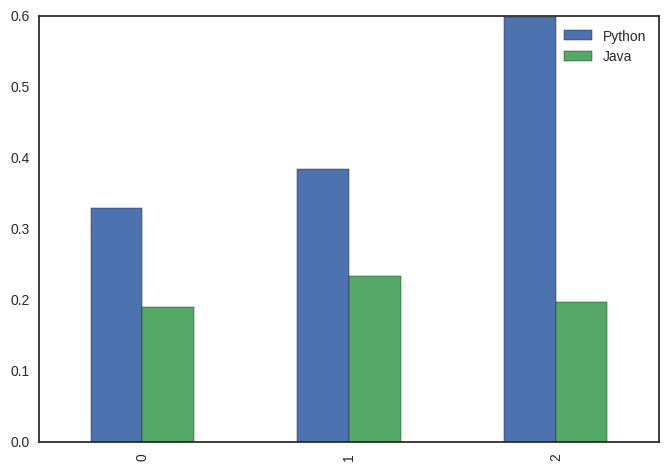

In [69]:
x = [[python["line_ratio"].mean(), java["line_ratio"].mean()], [python["class_ratio"].mean(), java["class_ratio"].mean()], [python["function_ratio"].mean(), java["function_ratio"].mean()]]
df2 = pd.DataFrame(x, columns=["Python", "Java"])
df2.plot.bar();

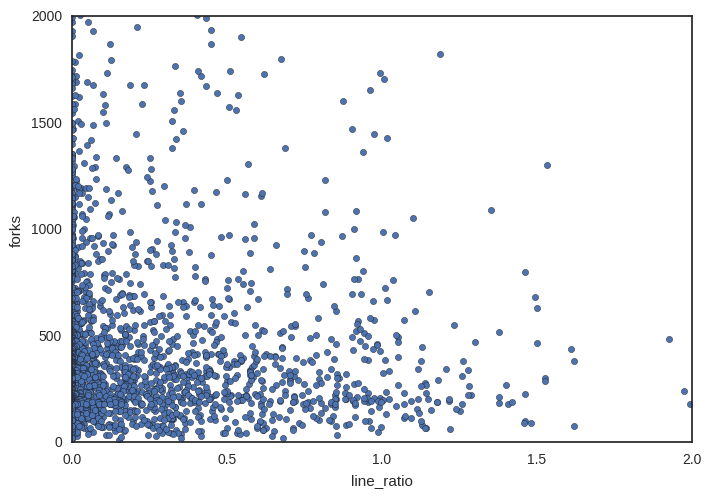

In [72]:
df.plot(kind="scatter", x="line_ratio", y="forks", xlim=(0,2), ylim=(0,2000))

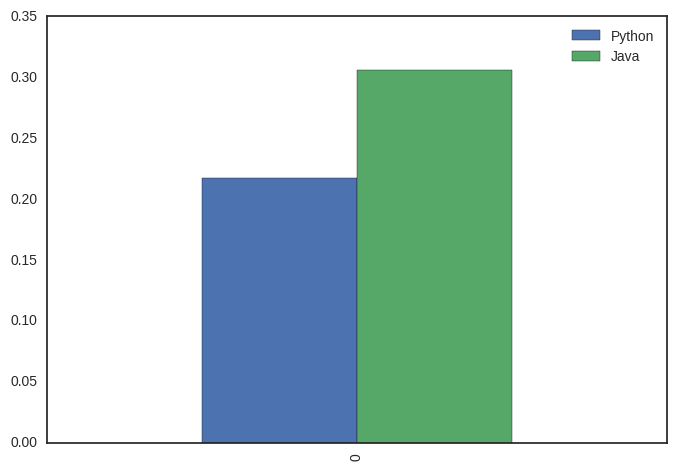

In [78]:
python_no_test = len(python[python["test_lines"] == 0]) / len(python)
java_no_test = len(java[java["test_lines"] == 0]) / len(java)
x = [[python_no_test, java_no_test]]
no_test = pd.DataFrame(x, columns=["Python", "Java"])
no_test.plot(kind="bar")